# Xpath

> #### Xpath란?
'XML Path Language'의 줄임말.
- XML 문서의 특정 요소 또는 속성에 접근하기 위한 경로를 지정하는 언어.
    - XML 문서를 탐색하고 조작하는 강력한 도구.
- 실무에서 데이터 스크래핑, 웹 스크래핑, XML 기반 웹 서비스에서 데이터 추출 등 다양한 분야에 활용됨.

> #### HTML 코드
요소(element)와 속성(attribute)으로 이루어져 있으며, 각 요소와 속성들은 계층 관계를 이루고 있음.
- Xpath는 XML 문서를 트리 구조로 표현.
- 최상위 노드부터 최하위 노드까지 모든 노드들과 속성, 데이터를 추출할 수 있는 경로를 나타내줌.
    - 노드: 요소, 속성, 텍스트 내용과 같은 XML 문서의 각 부분을 의미.

경로 가져오기.
- title 요소: html 요소 -> head 요소 -> title 요소 순으로 이루어져 있음.
    - Xpath: ```/html/head/title```
- 요소를 결부하는 속성은 '@'로 표현.
    - 첫번째 p요소: html 요소 -> body 요소 -> div 요소 -> div 요소 -> p요소(class='content1)
        - Xpath: ```/html/body/div/div/p[@class='content1]```

> #### Xpath의 두 가지 표현법
Xpath: 절대 경로
- 위에 사용한 방식과 동일.
- 가장 상위의 루트 노드에서부터 요소를 선택하는 방식.
    - ```html/body/div/div[p@class='content1]```

Xpath: 상대 경로
- '//'를 사용하여 중간 노드 path를 생략하고 지정된 노드에서부터 순서대로 탐색을 진행.
    - ```//p[@class='content1]```

> #### 그 외의 표현 문법
contains
- 해당 값을 포함하는 경우를 가져옴.
    - 'aa'를 포함하는 class명을 가진 div 요소 선택
        ```//div[contatins(@class, "aa)]```

last
- path에 해당되는 노드 중 마지막 노드를 가져옴.
    - class명이 'aa'인 div 노드 하위의 span 요소 중 마지막 요소 선택
        ```//div[@class="aa"]/span[last()]```

and
- 두 조건을 모두 만족하는 노드 가져옴.
    - class명에 'aa'와 'bb'를 포함하는 img 요소를 선택
        ```//img[contains(@class, "aa") and contains(@class, "bb")]```

not
- 해당 조건을 만족하지 않는 노드를 가져옴.
    - class명에 'aa'를 포함하고 'bb'를 포함하지 않는 img 요소를 선택
        ```//img[contains(@class, "aa") and not(contains(@class, "bb))]```

> #### vscode 터미널에 Scrapy Shell 을 이용해서 Xpath 출력하기
사이트 주소 입력
```scrapy shell "(사이트 주소)"```

원하는 Xpath의 내용 출력
- 요소 내용 하나만 출력
    ```response.xpath("//div[@class='aa']/span").get()```
- 요소 내용 여러 개 출력
    ```response.xpath("//div[@class='aa']/span").getall()```
- 요소 내용 텍스트만 출력
    ``````response.xpath("//div[@class='aa']/span/text()").get()``````

> #### 와일드카드란?
Xpath에서 어떠한 요소에든 매칭되며, 모든 요소를 선택하는데 사용됨.
- 'aa'를 포함하는 class명을 가진 모든 요소를 가져옴.
    ```//*[contains(@class, "aa")]```

> #### Xpath 계층 구조의 이해
축은 트리 구조에서 노드(node: 데이터 지점, 단위)를 참조하고 선택하는 데 사용되는 방향 또는 관계를 나타냄.
- self축
- parent축
- child축

HTML 코드

```
&lt;AAA&gt;
	&lt;BBB&gt;
        &lt;CCC/&gt;
        &lt;DDD/&gt;
    &lt;/BBB&gt;
    &lt;EEE&gt;
        &lt;FFF&gt;
            &lt;GGG/&gt;
            &lt;GGG/&gt;
            &lt;III&gt;
                &lt;JJJ/&gt;
            &lt;/III&gt;
        &lt;/FFF&gt;
    &lt;/EEE&gt;
    &lt;KKK&gt;
        &lt;LLL/&gt;
    &lt;/KKK&gt;
&lt;/AAA&gt;    
```

위 계층 구조를 그림으로 나타내기

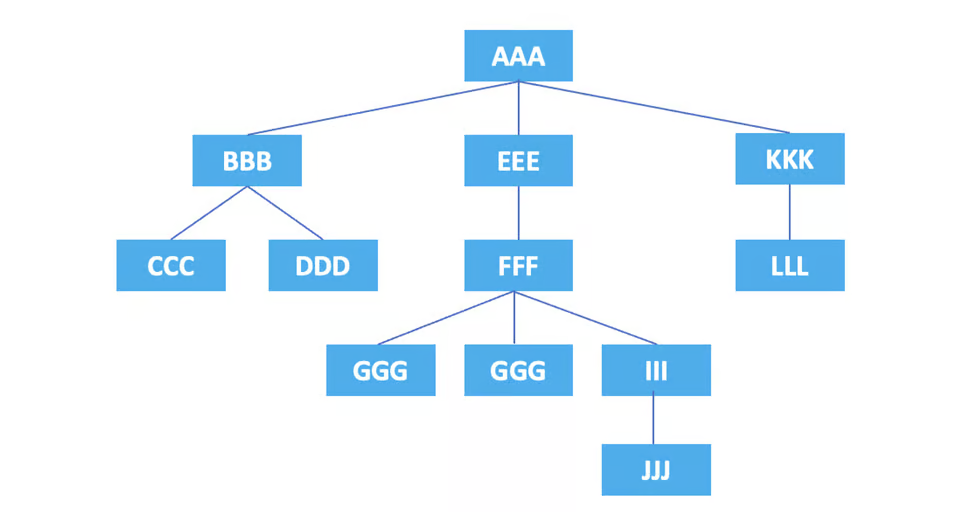

> #### 노드의 표현 방법
self
- 현재 노드 자체를 나타냄.
    - 현재 노드인 &lt;AAA&gt; 요소 선택
        ```/AAA/self::*```

parent
- 현재 노드의 부모 노드를 나타냄.
    - 현재 노드인 &lt;FFF&gt; 요소의 부모 노드인 &lt;EEE&gt; 요소 선택
        ```/AAA/EEE/FFF/parent::*```

child
- 현재 노드의 자식 노드를 나타냄.
    - 현재 노드인 &lt;FFF&gt; 요소의 자식 노드인 &lt;GGG&gt;, &lt;GGG&gt;, &lt;III&gt;가 모두 선택됨
        ```/AAA/EEE/FFF/child::*```
    - &lt;III&gt; 요소만 선택됨
        ```/AAA/EEE/FFF/child::III```
    - 두 &lt;GGG&gt; 요소 중 첫번째 &lt;GGG&gt; 요소가 선택됨
        ```/AAA/EEE/FFF/child::GGG[1]```
        - Xpath에서는 인덱스가 1부터 시작함을 주의.

ancestor
- 현재 노드의 모든 조상 노드를 나타냄.
    - 현재 노드인 &lt;FFF&gt; 요소의 조상 노드인 &lt;EEE&gt;, &lt;AAA&gt; 모두가 선택됨
        ```/AAA/EEE/FFF/ancestor::*```

descendant
- 현재 노드의 모든 후손 노드를 나타냄.
    - 현재 노드인 &lt;FFF&gt; 요소의 후손 노드인 &lt;GGG&gt;, &lt;GGG&gt;, &lt;III&gt;, &lt;JJJ&gt; 모두가 선택됨
        ```/AAA/EEE/FFF/descendant::*```

ancestor-or-self
- 현재 노드와 현재 노드의 모든 조상 노드를 나타냄.
    - 현재 노드인 &lt;FFF&gt; 요소 자신과 조상 노드가 모두 선택되어 &lt;FFF&gt;, &lt;EEE&gt;, &lt;AAA&gt; 모두가 선택됨
        ```/AAA/EEE/FFF/ancestor-or-self::*```

descendant-or-self
- 현재 노드와 현재 노드의 모든 후손 노드를 나타냄.
    - 현재 노드인 &lt;FFF&gt; 요소 자신과 후손 노드가 모두 선택되어 &lt;FFF&gt;, &lt;GGG&gt;, &lt;GGG&gt;, &lt;III&gt;, &lt;JJJ&gt; 모두가 선택됨
        ```/AAA/EEE/FFF/descendant-or-self::*```

following
- 현재 노드의 태그를 종료한 뒤에 나오는 모든 노드를 나타냄.
    - 현재 노드인 &lt;EEE&gt; 다음에 나오는 노드인 &lt;FFF&gt;, &lt;GGG&gt;, &lt;GGG&gt;, &lt;III&gt;, &lt;JJJ&gt;, &lt;KKK&gt;, &lt;LLL&gt;가 모두 선택됨
        ```/AAA/EEE/following::*```

precending
- 현재 노드의 태그가 시작되기 전에 나오는 모든 노드를 나타냄.
    - 현재 노드인 &lt;EEE&gt; 이전에 나오는 노드인 &lt;BBB&gt;, &lt;CCC&gt;, &lt;DDD&gt;가 모두 선택됨
        ```/AAA/EEE/preceding::*```

following-sibling
- 현재 노드 다음에 나오는 모든 형제 노드를 나타냄.
    - 현재 노드인 &lt;EEE&gt; 다음에 나오는 형제 노드인 &lt;KKK&gt;가 선택됨
        ```/AAA/EEE/following-sibling::*```

preceding-sibling
- 현재 노드 이전에 나오는 모든 형제 노드를 나타냄.
    - 현재 노드인 &lt;EEE&gt; 이전에 나오는 형제 노드인 &lt;BBB&gt;가 선택됨
        ```/AAA/EEE/preceding-sibling::*```

HTML 코드
```
&lt;root&gt;
  &lt;item&gt;Item 1&lt;/item&gt;
  &lt;item&gt;Item 2&lt;/item&gt;
  &lt;item&gt;Item 3&lt;/item&gt;
&lt;/root&gt;
```

> #### Xpath에 사용하는 함수
count
- 특정 조건에 맞는 노드의 개수를 반환함.
    - class 속성 값이 example인 div 요소의 개수를 반환
        ```count(//div[@class="example"])```
    - p 요소의 총 개수를 반환
        ```count(//p)```

position
- 현재 노드의 위치를 반환함.
- 위치는 1부터 시작하여 순차적으로 증가함.
  - 3개의 item 요소 중 두 번째 item 요소가 선택됨.
    ```//item[position() = 2]```

  